In [1]:
import numpy as np
from skimage import io,color,transform
import matplotlib.pyplot as plt


image1_path = r"C:\Users\Sephiroth\Downloads\iisc\courses\DIP\assignment 1\lena.jpg"
image2_path = r"C:\Users\Sephiroth\Downloads\iisc\courses\DIP\assignment 1\tiger.jpg"

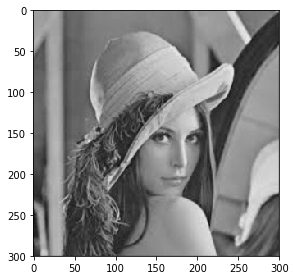

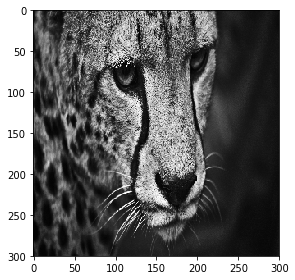

In [12]:
#displaying original pictures after resizing
im1 = transform.resize(color.rgb2gray(io.imread(image1_path)),(300,300))
im2 = transform.resize(color.rgb2gray(io.imread(image2_path)),(300,300))
io.imshow(im1)
plt.show()
io.imshow(im2)
plt.show()

2D FFT of the signals is taken and the magnitude and phase information is extracted. The images are reconstructed using the phase of the other image. 
If the information content is present in the magnitude spectrum then the reconstructed images should be similar to the actual image.
If the information content is present in the phase spectrum then the reconstructed image should be similar to the alternate image.
This experiment will help us determine which is more important.

In [13]:
#performing 2d fft and extracting magnitude and phase
im1_fourier = np.fft.fft2(im1)
im2_fourier = np.fft.fft2(im2)
im1_mag,im1_phase = np.absolute(im1_fourier),np.angle(im1_fourier)
im2_mag,im2_phase = np.absolute(im2_fourier),np.angle(im2_fourier)

In [14]:
#reconstructing inpute after phase swap
im1_recons_phase = np.fft.ifft2(im1_mag*np.exp(1j*im2_phase))
im2_recons_phase = np.fft.ifft2(im2_mag*np.exp(1j*im1_phase))

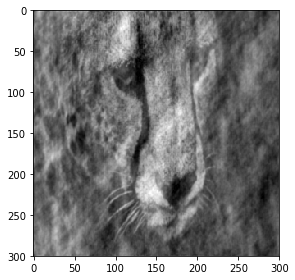

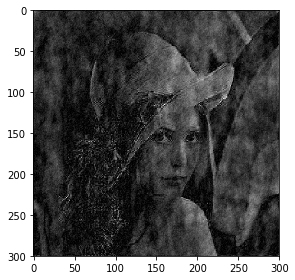

In [15]:
#displaying swapped images, normalizing the images so as to show them in gray scale without colormap
io.imshow(np.absolute(im1_recons_phase)/np.max(np.absolute(im1_recons_phase)))
plt.show()
io.imshow(np.absolute(im2_recons_phase)/np.max(np.absolute(im2_recons_phase)))
plt.show()

The reconstructed images with swapped phase possess most of the appearance of the image from which the phase information was extracted. This leads us to believe that phase might be more informative about the features than the magnitude.